In [4]:
import pandas as pd
import numpy as np
%matplotlib inline

#load specific formatting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf #for determining (p,q) orders
from pmdarima import auto_arima #for determining ARIMA orders

#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

#Load dataset
airline=pd.read_csv('C:\\Users\\rtd91\\OneDrive\\Desktop\\Intellipaat\\Python\\airline-passengers.csv',index_col='Month',parse_dates=True)
airline.index.freq="MS"

In [6]:
!pip install pmdarima

In [5]:
airline.shape

(144, 1)

In [5]:
airline.tail()

,Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [6]:
airline.shape

(144, 1)

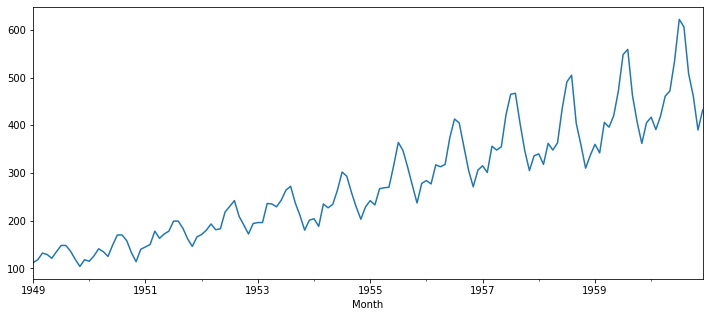

In [7]:
airline['Passengers'].plot(figsize=(12,5))

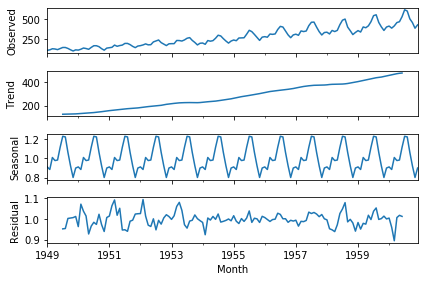

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
results=seasonal_decompose(airline['Passengers'],model="multiplicative")
results.plot();

In [9]:
stepwise_fit=auto_arima(airline['Passengers'],start_p=1,start_q=1,max_p=3,max_q=3,
                       m=12,start_P=0,seasonal=True,
                       d=None,D=1,trace=True,error_action="ignore",
                       suppress_warnings=True,stepwise=True)

stepwise_fit.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1024.824, BIC=1039.200, Fit time=0.736 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1033.479, BIC=1039.229, Fit time=0.032 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1022.316, BIC=1033.817, Fit time=0.626 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1022.904, BIC=1034.405, Fit time=0.573 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1031.508, BIC=1034.383, Fit time=0.042 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1022.343, BIC=1030.968, Fit time=0.203 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=1021.137, BIC=1035.513, Fit time=1.695 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1017.164, BIC=1034.415, Fit time=6.188 seconds
Near non-invertible roots for order (1, 1, 0)(2, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of t

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -501.922
Date:                            Thu, 16 Jan 2020   AIC                           1015.844
Time:                                    18:06:26   BIC                           1033.095
Sample:                                         0   HQIC                          1022.854
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.033      0.013      0.990      -0.065       0.066
ma.L1         -0.4235      0.068     -6.194      0.000      -0.558      -0.290
ar.S.L12       0.6663      0.158      4.229      0.000       0.358       0.975
ar.S.L24       0.3318      0.096      3.469      0.001       0.144       0.519
ma.S.L12      -0.9712      1.091     -0.890      0.373      -3.109       1.167
sigma2       110.8287     98.274      1.128      0.259     -81.785     303.443
===================================================================================
Ljung-Box (Q):                       53.12   Jarque-Bera (JB):                 7.55
Prob(Q):                              0.08   Prob(JB):                         0.02
Heteroskedasticity (H):               2.82   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
from statsmodels.tsa.statespace.tools import diff
airline['d1']=diff(airline["Passengers"],k_diff=1)


In [12]:
from statsmodels.tsa.stattools import adfuller
print('AugmentedDickey-Fuller Test on Airline Data')

dftest=adfuller(airline['d1'].dropna(),autolag='AIC')
dftest

AugmentedDickey-Fuller Test on Airline Data


(-2.8292668241700034,
 0.054213290283824954,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854084)

In [13]:
print('AugmentedDickey-Fuller Test on Airline Data')

dfout=pd.Series(dftest[0:4],index=['ADF test statistic','p value','# lags used','# observations'])

for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
print(dfout)

AugmentedDickey-Fuller Test on Airline Data
ADF test statistic       -2.829267
p value                   0.054213
# lags used              12.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64


In [14]:
from statsmodels.tsa.stattools import acf,pacf
acf(airline['Passengers'])

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092])

In [15]:
pacf(airline['Passengers'])

array([ 1.00000000e+00,  9.54677042e-01, -2.65277317e-01,  5.54695472e-02,
        1.08856215e-01,  8.11257853e-02,  4.12540544e-03,  1.56169553e-01,
        1.03708330e-01,  2.88781439e-01,  2.06918048e-01,  2.41129704e-01,
       -1.58004984e-01, -7.18324604e-01, -8.94806410e-02,  2.21605913e-01,
        1.34622533e-01,  1.15615719e-01,  1.94829396e-01,  9.66561845e-02,
       -2.02158680e-01, -9.36381005e-02, -3.45594572e-01, -1.06170206e-01,
        2.77804723e-01,  5.87815922e-02,  9.86624045e-03,  2.37687367e-01,
        9.40568218e-02, -1.47505422e-01, -1.88609051e-01, -2.52801158e-01,
       -2.57153789e-01, -1.40349613e-01,  1.88263087e-01,  1.30686258e-01,
        5.23902189e-01,  6.91426442e-01,  9.91163921e-01,  3.71021065e+01,
       -8.85334119e-01])

In [16]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

acf(airline['Passengers'])

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092])

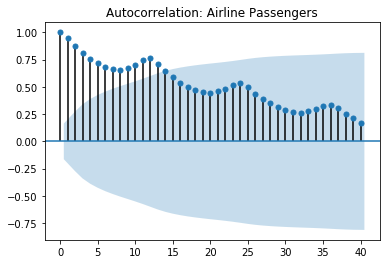

In [17]:
title='Autocorrelation: Airline Passengers'
lags=40
plot_acf(airline['Passengers'],title=title,lags=lags);

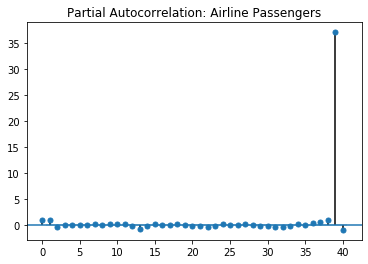

In [18]:
plot_pacf(airline['Passengers'],title="Partial Autocorrelation: Airline Passengers",lags=40);

In [19]:
airline.shape

(144, 2)

In [20]:
#Set one year for testing
train=airline.iloc[:132]
test=airline.iloc[132:]

In [21]:
model=ARIMA(train['Passengers'],order=(1,1,0))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                  131
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -631.157
Method:                       css-mle   S.D. of innovations             29.926
Date:                Thu, 16 Jan 2020   AIC                           1268.313
Time:                        18:07:10   BIC                           1276.939
Sample:                    02-01-1949   HQIC                          1271.818
                         - 12-01-1959                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.3733      3.661      0.648      0.518      -4.802       9.549
ar.L1.D.Passengers     0.2879      0.084      3.435      0.001       0.124       0.452
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.4729           +0.0000j            3.4729            0.0000
-----------------------------------------------------------------------------
"""

In [22]:
#Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions=results.predict(start=start,end=end,dynamic=False,typ='levels').rename('ARIMA(1,1,0) Predictions') 

In [23]:
#Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]},expected={test['Passengers'][i]}")

predicted=419.0715589393721,expected=417
predicted=424.81331073195724,expected=391
predicted=428.15653413660596,expected=419
predicted=430.8091126888158,expected=461
predicted=433.26282333743967,expected=472
predicted=435.6592709181683,expected=535
predicted=438.03922987058826,expected=622
predicted=440.4144410008342,expected=606
predicted=442.7882850182449,expected=508
predicted=445.1617353820107,expected=461
predicted=447.5350723950799,expected=390
predicted=449.9083767693547,expected=432


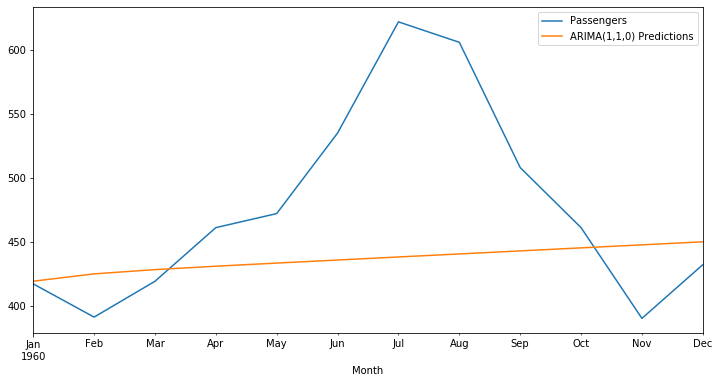

In [24]:
#Plot predictions against known values
ax=test['Passengers'].plot(legend=True,figsize=(12,6))
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [25]:
from sklearn.metrics import mean_squared_error

error=mean_squared_error(test['Passengers'],predictions)
print(f'ARIMA(1,1,0) MSE Error:{error}')

ARIMA(1,1,0) MSE Error:6908.888970840563


In [26]:
from statsmodels.tools.eval_measures import rmse

error=rmse(test['Passengers'],predictions)
print(f'ARIMA(1,1,1) RMSE Error:{error}')

ARIMA(1,1,1) RMSE Error:83.11972672501133


In [27]:
model=ARIMA(airline['Passengers'],order=(1,1,0))
results=model.fit()

fcast=results.predict(len(airline),len(airline)+12*10,typ='levels').rename('ARIMA(1,1,0) Forecast')

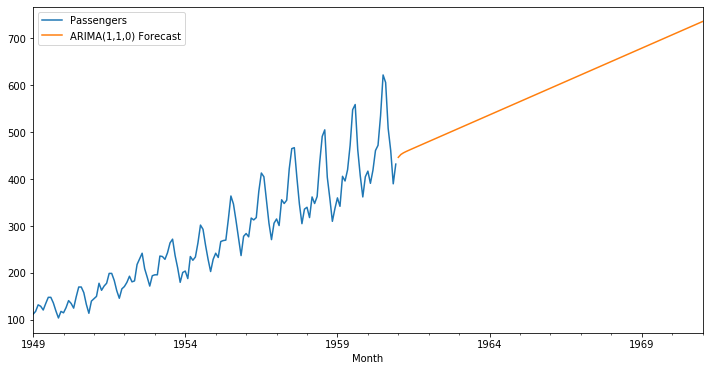

In [28]:
#Plot predictions against known values

ax=airline['Passengers'].plot(legend=True,figsize=(12,6))
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model=SARIMAX(train['Passengers'],order=(1,1,0),seasonal_order=(2,1,1,12),enforce_invertibility=False)
results-=model.fit()
results.summary()

In [35]:
model=SARIMAX(train['Passengers'],order=(1,1,0),seasonal_order=(2,1,1,12),enforce_invertibility=False)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  132
Model:             SARIMAX(1, 1, 0)x(2, 1, 1, 12)   Log Likelihood                -442.551
Date:                            Thu, 16 Jan 2020   AIC                            895.101
Time:                                    18:11:22   BIC                            908.997
Sample:                                01-01-1949   HQIC                           900.744
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3094      0.084     -3.705      0.000      -0.473      -0.146
ar.S.L12       0.7119      0.229      3.106      0.002       0.263       1.161
ar.S.L24       0.2867      0.099      2.889      0.004       0.092       0.481
ma.S.L12      -0.9749      1.762     -0.553      0.580      -4.428       2.478
sigma2        87.8513    135.382      0.649      0.516    -177.492     353.195
===================================================================================
Ljung-Box (Q):                       37.19   Jarque-Bera (JB):                 0.20
Prob(Q):                              0.60   Prob(JB):                         0.91
Heteroskedasticity (H):               1.59   Skew:                            -0.06
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
#Obtain predicted values

start=len(train)
end=len(train)+len(test)-1
predictions=results.predict(start=start,end=end,dynamic=False,typ='levels').rename('SARIMAX(1,1,0) Predictions')

In [37]:
#Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]},expected={test['Passengers'][i]}")

predicted=420.3812601228997,expected=417
predicted=399.9113054544712,expected=391
predicted=462.33562642842116,expected=419
predicted=450.58106547381186,expected=461
predicted=475.0384474057249,expected=472
predicted=536.818847853809,expected=535
predicted=612.8224456945668,expected=622
predicted=625.884967452022,expected=606
predicted=519.8389139773108,expected=508
predicted=463.5008710331626,expected=461
predicted=414.322354465206,expected=390
predicted=455.06573618953354,expected=432


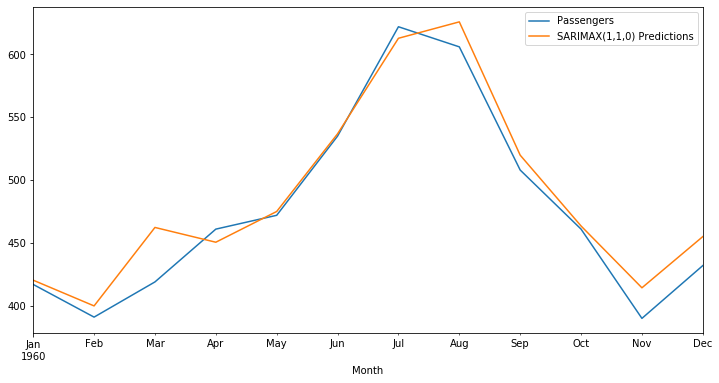

In [38]:
#Plot predictions against known values
ax=test['Passengers'].plot(legend=True,figsize=(12,6))
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [39]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test['Passengers'],predictions)
print(f'SARIMAX(1,1,0) MSE Error:{error}')

SARIMAX(1,1,0) MSE Error:319.9645130049201


In [41]:
from statsmodels.tools.eval_measures import rmse
error=rmse(test['Passengers'],predictions)
print(f'ARIMA(1,1,1) RMSE Error:{error}')

ARIMA(1,1,1) RMSE Error:17.88755190083093


Retrain the model on the full data and forecast the future

In [42]:
model=SARIMAX(airline['Passengers'],order=(1,1,0),seasonal_order=(2,1,1,12),enforce_invertibility=False)
results=model.fit()

fcast=results.predict(len(airline),len(airline)+12*10,typ='levels').rename('SARIMAX(1,1,0) Forecast')

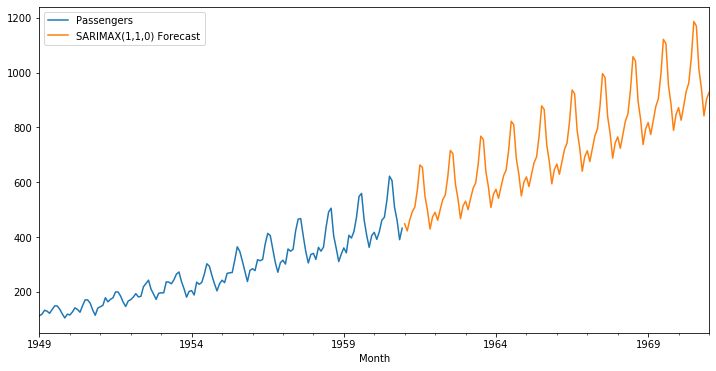

In [43]:
#Plot predictions against known values

ax=airline['Passengers'].plot(legend=True,figsize=(12,6))
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)